Importing Libraries

In [1]:
# Install if not already
# !pip install pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Uploading the files

In [2]:
from google.colab import files

# Upload Annotation File
uploaded = files.upload()
# Select your annotation file
# Upload Gene Expression File
uploaded = files.upload()
# Select your gene expression file



Saving GSE16873_series_matrix.csv to GSE16873_series_matrix.csv


Saving annotation file.csv to annotation file.csv


In [3]:
# Replace filenames with your uploaded file names

annotation = pd.read_csv('annotation file.csv')
expression = pd.read_csv('GSE16873_series_matrix.csv')


Checking Data, Columns, and Missing values

In [4]:
# Check top rows
print(annotation.head())
print(expression.head())

# Check column names
print(annotation.columns)
print(expression.columns)

# Check for missing values
print(annotation.isnull().sum())
print(expression.isnull().sum())


          ID  GB_ACC Species Scientific Name                 Gene Title  \
0  1007_s_at  U48705            Homo sapiens               complete cds   
1    1053_at  M87338            Homo sapiens   40-kDa subunit (A1) mRNA   
2     117_at  X51757            Homo sapiens                     X51757   
3     121_at  X69699            Homo sapiens                     X69699   
4  1255_g_at  L36861            Homo sapiens               complete cds   

                            Gene Symbol  
0                                U48705  
1                          complete cds  
2  heat shock 70kDa protein 6 (HSP70B')  
3                          paired box 8  
4                                L36861  
      ID_REF   1 HN   1 SH  1 ADH  1 DCIS   2 HN  2 ADH  2 DCIS   3 HN  3 ADH  \
0  1007_s_at  682.3  860.7  952.7  1177.6  776.1  570.3   929.5  629.2  692.4   
1    1053_at    2.8    6.2    6.3    28.6   22.0   11.9     5.2   11.3    5.4   
2     117_at   29.4   34.4   49.7    57.0   34.5   16.

In [5]:
# Remove Extra Spaces from Key Columns:
annotation['ID'] = annotation['ID'].astype(str).str.strip()
expression['ID_REF'] = expression['ID_REF'].astype(str).str.strip()


Matching Primary Key or Ids

In [6]:
# Check how many IDs are common
common_ids = set(annotation['ID']).intersection(set(expression['ID_REF']))
print(f"Total common IDs: {len(common_ids)}")
print(f"IDs in Annotation: {annotation['ID'].nunique()}")
print(f"IDs in Expression: {expression['ID_REF'].nunique()}")


Total common IDs: 22283
IDs in Annotation: 22283
IDs in Expression: 22283


Cleaning

Merging both data files with selected columns

In [7]:
merged = pd.merge(
    expression,
    annotation[['ID', 'Gene Title', 'Gene Symbol']],
    left_on='ID_REF',
    right_on='ID',
    how='left'
)

print(merged.head())


      ID_REF   1 HN   1 SH  1 ADH  1 DCIS   2 HN  2 ADH  2 DCIS   3 HN  3 ADH  \
0  1007_s_at  682.3  860.7  952.7  1177.6  776.1  570.3   929.5  629.2  692.4   
1    1053_at    2.8    6.2    6.3    28.6   22.0   11.9     5.2   11.3    5.4   
2     117_at   29.4   34.4   49.7    57.0   34.5   16.5    28.5   23.0   64.1   
3     121_at  158.5  178.1  286.6   324.3  229.6  154.0   237.8  143.5  196.4   
4  1255_g_at   13.6   19.5   23.2    15.3    6.8    9.2     5.7   11.5   12.2   

   ...  10 DCIS  11 HN  11 ADH  11 DCIS  12 HN  12 ADH  12 DCIS         ID  \
0  ...    357.1  606.5   644.7    564.5  219.8   384.3    310.6  1007_s_at   
1  ...      9.7   11.2     2.4      8.7    2.1    14.8     13.6    1053_at   
2  ...     11.1   20.5     7.2     25.4   11.3    25.3     16.6     117_at   
3  ...    114.3  186.2   198.8    199.1   97.5   121.2    114.8     121_at   
4  ...      4.7   13.5     5.1      4.8    1.8     3.2      8.8  1255_g_at   

                  Gene Title                

Confirming Merge

Filter Out Rows with Missing Gene Symbols

In [11]:
# Remove rows where Gene Symbol is missing or '---'
cleaned_data = merged[merged['Gene Symbol'].notnull() & (merged['Gene Symbol'] != '---')]


In [12]:
print(merged.columns)


Index(['ID_REF', '1 HN', '1 SH', '1 ADH', '1 DCIS', '2 HN', '2 ADH', '2 DCIS',
       '3 HN', '3 ADH', '3 DCIS', '4 HN', '4 SH', '4 ADH', '4 DCIS', '5 HN',
       '5 ADH', '5 DCIS', '6 HN', '6 ADH', '6 DCIS', '7 HN', '7 ADH', '7 DCIS',
       '8 HN', '8 ADH', '8 DCIS', '9 HN', '9 SH', '9 ADH', '9 DCIS', '10 HN',
       '10 SH', '10 ADH', '10 DCIS', '11 HN', '11 ADH', '11 DCIS', '12 HN',
       '12 ADH', '12 DCIS', 'ID', 'Gene Title', 'Gene Symbol'],
      dtype='object')


Cleaning of Merged Data

In [13]:


# Group by Gene Symbol and take the mean for duplicate genes
cleaned_data = merged.groupby('Gene Symbol').mean(numeric_only=True).reset_index()

# Remove zero-variance genes (no change across samples)
variance = cleaned_data.var(axis=1, numeric_only=True)
cleaned_data = cleaned_data[variance > 0]

# ✅ Check the cleaned dataset
print(cleaned_data.head())
print(f"Shape of cleaned data: {cleaned_data.shape}")

                                         Gene Symbol    1 HN   1 SH   1 ADH  \
0                a novel gene based on ESTs and cDNA  616.70  545.8  449.30   
1    the HMG17L3 gene encoding two putative isofo...  145.50  189.1  258.20   
2                                            (alpha)   70.00   65.7   74.55   
3                   (cationic amino acid transporter   65.60   83.7  123.40   
4   (f-spondin) extracellular matrix protein /FL=...   58.65  105.0   68.35   

   1 DCIS    2 HN   2 ADH  2 DCIS   3 HN   3 ADH  ...  10 HN   10 SH  10 ADH  \
0  777.00  599.30  460.10  298.20  250.4  224.90  ...  112.9  107.20   65.10   
1  287.70  163.00   95.70  109.30  113.9  111.70  ...   50.9   36.10   42.00   
2   31.15   59.25   52.65   73.00   44.4   56.15  ...   25.4   31.70   35.45   
3  145.40   58.70   43.30   61.00   72.9   30.40  ...   24.4   20.10   23.20   
4  113.20  251.30   47.65   41.05  147.9   47.95  ...   55.3   52.75  113.75   

   10 DCIS   11 HN  11 ADH  11 DCIS   12 HN 

Selecting First 200 genes (rows), First 5 samples (columns) + Gene Symbol

In [14]:
# ✅ Check column names first
print(merged.columns)

# ✅ Select Gene Symbol and first 5 samples
# Adjust column names as per your dataset (Example given)
subset = merged[['Gene Symbol', '1 HN', '1 ADH', '1 DCIS', '2 HN', '2 ADH','2 DCIS',
       '3 HN', '3 ADH', '3 DCIS', '4 HN', '4 SH', '4 ADH', '4 DCIS', '5 HN',
       '5 ADH', '5 DCIS']].head(200)

# ✅ Display subset
print(subset)


Index(['ID_REF', '1 HN', '1 SH', '1 ADH', '1 DCIS', '2 HN', '2 ADH', '2 DCIS',
       '3 HN', '3 ADH', '3 DCIS', '4 HN', '4 SH', '4 ADH', '4 DCIS', '5 HN',
       '5 ADH', '5 DCIS', '6 HN', '6 ADH', '6 DCIS', '7 HN', '7 ADH', '7 DCIS',
       '8 HN', '8 ADH', '8 DCIS', '9 HN', '9 SH', '9 ADH', '9 DCIS', '10 HN',
       '10 SH', '10 ADH', '10 DCIS', '11 HN', '11 ADH', '11 DCIS', '12 HN',
       '12 ADH', '12 DCIS', 'ID', 'Gene Title', 'Gene Symbol'],
      dtype='object')
                                           Gene Symbol   1 HN   1 ADH  1 DCIS  \
0                                               U48705  682.3   952.7  1177.6   
1                                         complete cds    2.8     6.3    28.6   
2                 heat shock 70kDa protein 6 (HSP70B')   29.4    49.7    57.0   
3                                         paired box 8  158.5   286.6   324.3   
4                                               L36861   13.6    23.2    15.3   
..                                    

verify current subset:

In [15]:
# Check for nulls
print(subset.isnull().sum())

# Check for duplicates in Gene Symbol
print(subset['Gene Symbol'].duplicated().sum())

# Check zero variance rows
variance = subset.var(axis=1, numeric_only=True)
print(f"Zero variance genes: {(variance == 0).sum()}")


Gene Symbol    0
1 HN           0
1 ADH          0
1 DCIS         0
2 HN           0
2 ADH          0
2 DCIS         0
3 HN           0
3 ADH          0
3 DCIS         0
4 HN           0
4 SH           0
4 ADH          0
4 DCIS         0
5 HN           0
5 ADH          0
5 DCIS         0
dtype: int64
5
Zero variance genes: 0


5 duplicates in gene symbols. lets Handle duplicate gene symbols by averaging

In [16]:
# Handle duplicate gene symbols by averaging
clean_subset = subset.groupby('Gene Symbol').mean(numeric_only=True).reset_index()

print(clean_subset.shape)
clean_subset.head()


(195, 17)


,Gene Symbol,1 HN,1 ADH,1 DCIS,2 HN,2 ADH,2 DCIS,3 HN,3 ADH,3 DCIS,4 HN,4 SH,4 ADH,4 DCIS,5 HN,5 ADH,5 DCIS
0,145kD (SF3B2),311.6,436.80,436.6,581.30,518.9,922.30,135.4,146.1,113.7,237.80,111.2,234.7,184.1,183.8,109.7,194.8
1,150170kD) (EIF3S10),264.1,736.20,827.3,942.90,1311.7,1319.40,647.7,1033.4,313.4,66.70,101.1,105.2,59.6,692.8,687.9,1335.8
2,150170kD) /FL=gb:D50929.1 gb:U58046.1 gb:U783...,335.7,435.65,531.6,177.05,167.6,205.65,200.8,252.1,125.1,172.65,144.2,156.3,116.9,242.9,185.4,326.7
3,2-oxoglutarate 4-dioxygenase (proline 4-hydro...,1502.1,2865.20,3363.5,2076.30,1722.9,2905.80,1409.4,3266.7,1354.2,846.70,609.7,2063.6,2063.9,1510.2,1134.3,2270.1
4,200 kDa (DEXH RNA helicase family),827.2,1220.70,1359.1,659.90,536.6,710.90,813.3,616.4,390.8,627.70,510.5,658.0,868.2,837.5,727.0,1059.6


In [17]:
# Example: Assuming your cleaned dataset is called 'subset_df'
clean_subset.to_csv('clean_subset.csv', index=False)


In [ ]:
from google.colab import files
files.download('clean_subset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reshape to long format (from wide) —

In [19]:
long_df = clean_subset.melt(id_vars=['Gene Symbol'],
                            var_name='Sample',
                            value_name='Expression')


Extract Patient ID and Condition

In [22]:
# Extract patient and condition from 'Sample'
long_df['Patient'] = long_df['Sample'].str.extract(r'(\d+)')
long_df['Condition'] = long_df['Sample'].str.extract(r'([A-Z]+)')

# Check
long_df.head()


,Gene Symbol,Sample,Expression,Patient,Condition
0,145kD (SF3B2),1 HN,311.6,1,HN
1,150170kD) (EIF3S10),1 HN,264.1,1,HN
2,150170kD) /FL=gb:D50929.1 gb:U58046.1 gb:U783...,1 HN,335.7,1,HN
3,2-oxoglutarate 4-dioxygenase (proline 4-hydro...,1 HN,1502.1,1,HN
4,200 kDa (DEXH RNA helicase family),1 HN,827.2,1,HN


Map Condition to Meaningful Labels

In [ ]:
condition_map = {
    'HN': 'Healthy',
    'ADH': 'Atypical (Pre-cancer)',
    'DCIS': 'Cancer (DCIS)',
    'SH': 'Stroma'  # Or label correctly based on your dataset
}

long_df['Condition_Label'] = long_df['Condition'].map(condition_map)

# Check
long_df.head()


,Gene Symbol,Sample,Expression,Patient,Condition,Condition_Label
0,145kD (SF3B2),1 HN,311.6,1,HN,Healthy
1,150170kD) (EIF3S10),1 HN,264.1,1,HN,Healthy
2,150170kD) /FL=gb:D50929.1 gb:U58046.1 gb:U783...,1 HN,335.7,1,HN,Healthy
3,2-oxoglutarate 4-dioxygenase (proline 4-hydro...,1 HN,1502.1,1,HN,Healthy
4,200 kDa (DEXH RNA helicase family),1 HN,827.2,1,HN,Healthy


Exploratory Data Analysis (EDA).

Step 1: Distribution of Overall Gene Expression (Histogram)

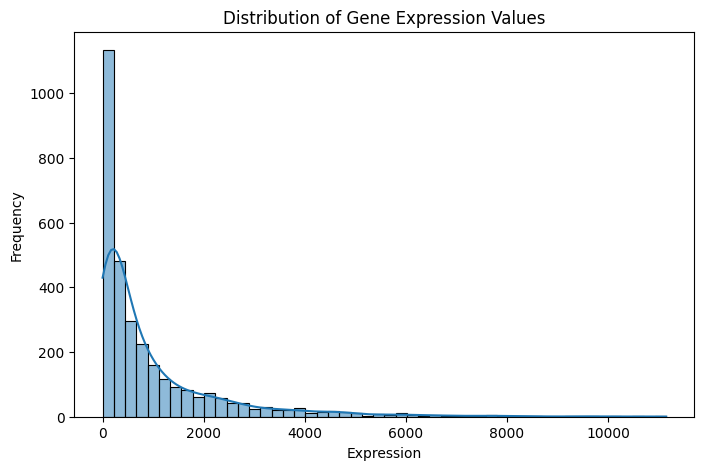

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))  # Set the size of the plot
sns.histplot(long_df['Expression'], bins=50, kde=True)  # Histogram + density curve
plt.title('Distribution of Gene Expression Values')  # Title of the plot
plt.xlabel('Expression')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot


Step 2: Sample-wise Distribution (Boxplot)

Higher median line	Higher overall gene expression.
Taller box	More gene variability.
Short box	Less variability (genes similar).
More outliers	More extreme genes (high/low).

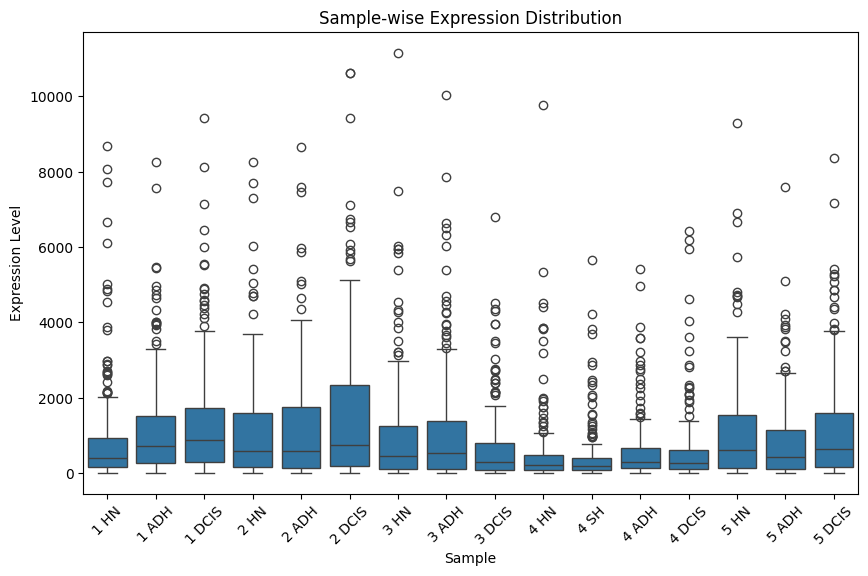

In [ ]:
plt.figure(figsize=(10,6))  # Set figure size
sns.boxplot(x='Sample', y='Expression', data=long_df)  # Boxplot for each sample
plt.title('Sample-wise Expression Distribution')
plt.xlabel('Sample')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)  # Rotate labels if too crowded
plt.show()


Are the samples behaving as expected?
(e.g., Do the cancer samples cluster together? Are the healthy samples similar?)

Correlation Heatmap next.

It’s quick.
Check sample similarities
You’ll immediately know if your dataset is reliable or weird.

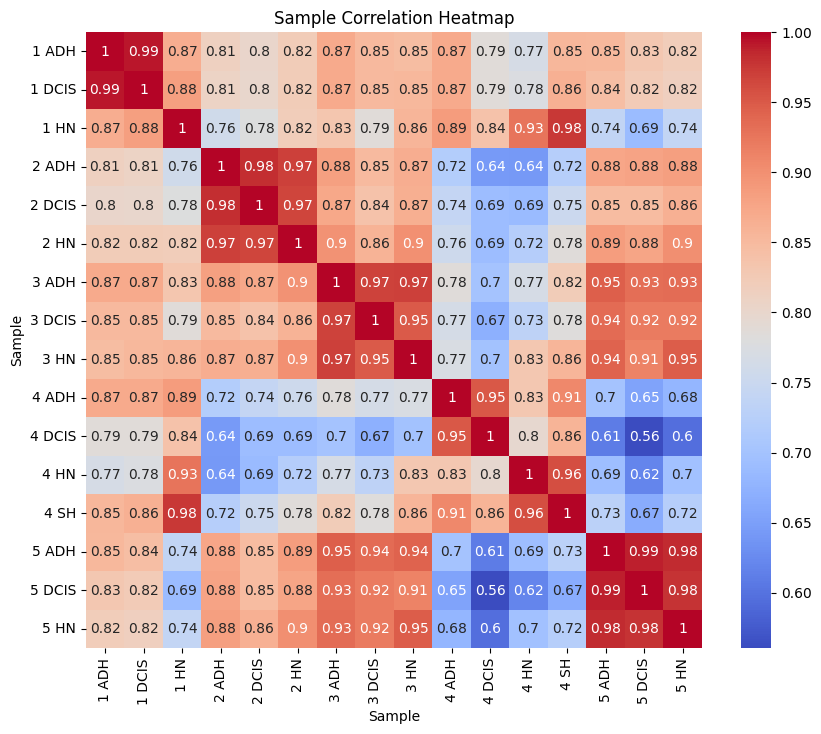

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 👉 Create a pivot table: rows = Gene Symbols, columns = Samples
pivot_df = long_df.pivot(index='Gene Symbol', columns='Sample', values='Expression')

# 👉 Compute the correlation matrix between samples (columns)
corr = pivot_df.corr()

# 👉 Plot the heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

plt.title('Sample Correlation Heatmap')
plt.show()


calculate average correlation

In [ ]:
# Remove diagonal (self-correlation) to get overall correlation
corr_matrix = long_df.pivot(index='Gene Symbol', columns='Sample', values='Expression').corr()
avg_corr = (corr_matrix.values.sum() - len(corr_matrix)) / (len(corr_matrix)**2 - len(corr_matrix))
print(f"Average correlation: {avg_corr:.2f}")


Average correlation: 0.82


Interpretation:
The average correlation among all samples is 0.82, suggesting that the gene expression profiles are overall highly consistent. This indicates good data quality with reasonable biological variability. Some lower correlation pairs, particularly between DCIS samples of different patients, may reflect biological heterogeneity in disease progression or minor technical variation.

PCA Code Specific for Long Format Data
✅ Step 1: Pivot Data → Make Genes as columns, Samples as rows

In [ ]:
# Pivot long_df → Samples as rows, Genes as columns
pca_input = long_df.pivot_table(
    index='Sample',      # Each sample becomes a row
    columns='Gene Symbol',   # Each gene becomes a column
    values='Expression'  # Expression values fill the table
)

# Optional: Check shape
print(pca_input.shape)


(16, 195)


Step 2: Run PCA

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA for 2 components (for plotting)
pca = PCA(n_components=2)

# Fit and transform the data
pca_result = pca.fit_transform(pca_input)

# Create a dataframe with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add back sample info
pca_df['Sample'] = pca_input.index

# Merge back sample conditions (HN, ADH, DCIS)
pca_df = pca_df.merge(
    long_df[['Sample', 'Condition', 'Patient']].drop_duplicates(),
    on='Sample',
    how='left'
)


Step 3: Plot PCA

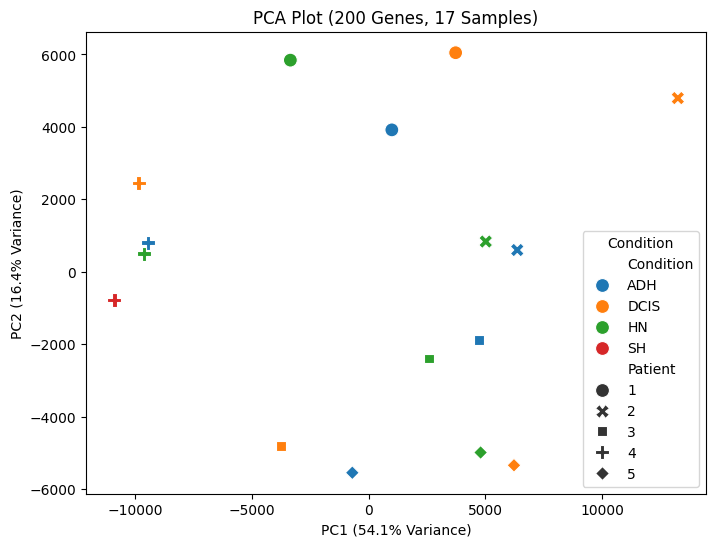

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Condition',          # Color by condition (HN, ADH, DCIS)
    style='Patient',          # Optional: Use different marker shapes for patients
    s=100
)

plt.title('PCA Plot (200 Genes, 17 Samples)')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)")
plt.legend(title='Condition')

plt.show()


Differential Expression Analysis

Step 1: Filter the Data for DCIS and HN Samples

In [24]:
# Filter for DCIS and HN samples only
dea_df = long_df[long_df['Condition'].isin(['DCIS', 'HN'])]

# Check
print(dea_df['Condition'].value_counts())


Condition
HN      975
DCIS    975
Name: count, dtype: int64


Step 2: Pivot to Wide Format for Statistical Test

In [25]:
# Pivot the long dataframe
dea_wide = dea_df.pivot_table(index='Gene Symbol',
                               columns='Sample',
                               values='Expression')

# Check
print(dea_wide.shape)
dea_wide.head()


(195, 10)


Sample,1 DCIS,1 HN,2 DCIS,2 HN,3 DCIS,3 HN,4 DCIS,4 HN,5 DCIS,5 HN
Gene Symbol,,,,,,,,,,
145kD (SF3B2),436.6,311.6,922.30,581.30,113.7,135.4,184.1,237.80,194.8,183.8
150170kD) (EIF3S10),827.3,264.1,1319.40,942.90,313.4,647.7,59.6,66.70,1335.8,692.8
150170kD) /FL=gb:D50929.1 gb:U58046.1 gb:U78311.1 gb:NM_003750.1,531.6,335.7,205.65,177.05,125.1,200.8,116.9,172.65,326.7,242.9
2-oxoglutarate 4-dioxygenase (proline 4-hydroxylase),3363.5,1502.1,2905.80,2076.30,1354.2,1409.4,2063.9,846.70,2270.1,1510.2
200 kDa (DEXH RNA helicase family),1359.1,827.2,710.90,659.90,390.8,813.3,868.2,627.70,1059.6,837.5


Step 3: Create Sample Labels (DCIS or HN)

In [26]:
# Map samples to their conditions
sample_conditions = dea_df[['Sample', 'Condition']].drop_duplicates()
sample_conditions = sample_conditions.set_index('Sample')['Condition'].to_dict()

# Check
print(sample_conditions)


{'1 HN': 'HN', '1 DCIS': 'DCIS', '2 HN': 'HN', '2 DCIS': 'DCIS', '3 HN': 'HN', '3 DCIS': 'DCIS', '4 HN': 'HN', '4 DCIS': 'DCIS', '5 HN': 'HN', '5 DCIS': 'DCIS'}


Step 4: Perform t-test for Each Gene

In [31]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

results = []

for gene in dea_wide.index:
    gene_data = dea_wide.loc[gene]

    # Split samples by condition
    hn_samples = [sample for sample in gene_data.index if sample_conditions[sample] == 'HN']
    dcis_samples = [sample for sample in gene_data.index if sample_conditions[sample] == 'DCIS']

    hn_values = gene_data[hn_samples].dropna()
    dcis_values = gene_data[dcis_samples].dropna()

    # t-test
    t_stat, p_val = ttest_ind(hn_values, dcis_values, equal_var=False)

    # log2 Fold Change (add +1 to avoid zero division)
    log2fc = np.log2((dcis_values.mean() + 1) / (hn_values.mean() + 1))

    results.append({
        'Gene': gene,
        'Log2FC': log2fc,
        'P-value': p_val
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Adjust p-values for multiple testing (FDR correction)
from statsmodels.stats.multitest import multipletests
results_df['Adj_P-value'] = multipletests(results_df['P-value'], method='fdr_bh')[1]

results_df.head()


,Gene,Log2FC,P-value,Adj_P-value
0,145kD (SF3B2),0.351665,0.649060,0.902390
1,150170kD) (EIF3S10),0.559661,0.440924,0.890299
2,150170kD) /FL=gb:D50929.1 gb:U58046.1 gb:U783...,0.209065,0.687378,0.905667
3,2-oxoglutarate 4-dioxygenase (proline 4-hydro...,0.702762,0.057615,0.890299
4,200 kDa (DEXH RNA helicase family),0.220609,0.496463,0.902390


 Step 5: Volcano Plot

/tmp/ipython-input-32-1166079844.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


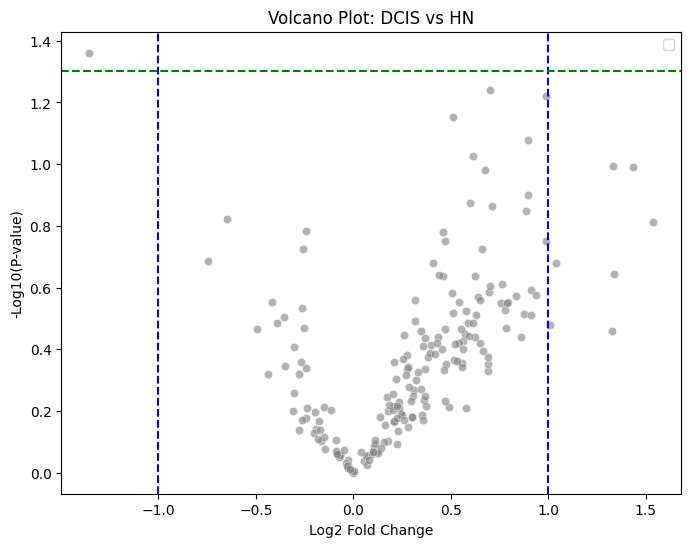

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# Plot all genes
sns.scatterplot(
    x='Log2FC',
    y=-np.log10(results_df['P-value']),
    data=results_df,
    color='grey',
    alpha=0.6
)

# Highlight significant genes
sig_genes = results_df[
    (results_df['Adj_P-value'] < 0.05) & (abs(results_df['Log2FC']) > 1)
]
sns.scatterplot(
    x='Log2FC',
    y=-np.log10(sig_genes['P-value']),
    data=sig_genes,
    color='red',
    label='Significant'
)

# Threshold lines
plt.axvline(x=1, color='blue', linestyle='--')
plt.axvline(x=-1, color='blue', linestyle='--')
plt.axhline(y=-np.log10(0.05), color='green', linestyle='--')

plt.title('Volcano Plot: DCIS vs HN')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(P-value)')
plt.legend()
plt.show()


Get Upregulated and Downregulated Genes:

In [34]:
print(results_df.columns)


Index(['Gene', 'Log2FC', 'P-value', 'Adj_P-value'], dtype='object')


In [35]:
# ✅ Filter significantly upregulated genes (in DCIS compared to HN)
upregulated = results_df[
    (results_df['Log2FC'] >= 1) & (results_df['P-value'] < 0.05)
]

# ✅ Filter significantly downregulated genes (higher in HN)
downregulated = results_df[
    (results_df['Log2FC'] <= -1) & (results_df['P-value'] < 0.05)
]

# ✅ Print results
print("Upregulated genes in DCIS:")
print(upregulated[['Gene', 'Log2FC', 'P-value']])

print("\nDownregulated genes in DCIS (Up in Healthy):")
print(downregulated[['Gene', 'Log2FC', 'P-value']])


Upregulated genes in DCIS:
Empty DataFrame
Columns: [Gene, Log2FC, P-value]
Index: []

Downregulated genes in DCIS (Up in Healthy):
          Gene    Log2FC   P-value
124  NM_004078 -1.353276  0.043518
